# 동시출현빈도 전처리

In [1]:
# Install
!pip install konlpy

!pip install lxml
!pip install utils
!pip install paramiko
!pip install nltk
!pip install -U genism
!pip install Afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import csv
import pandas as pd
import konlpy
import sys
import numpy as np
from konlpy.tag import Okt
from collections import Counter
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from IPython.display import Image
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
files.upload()

Saving 에이센트_평점별리뷰.csv to 에이센트_평점별리뷰 (1).csv
Saving 플로랑향기뿜뿜_평점별리뷰.csv to 플로랑향기뿜뿜_평점별리뷰 (1).csv
Saving 코코도르_평점별리뷰.csv to 코코도르_평점별리뷰 (1).csv
Saving 헤트라스_평점별리뷰.csv to 헤트라스_평점별리뷰 (1).csv
Saving 헤오드_평점별리뷰.csv to 헤오드_평점별리뷰 (1).csv


In [3]:
df1 = pd.read_csv('에이센트_평점별리뷰.csv')
df2 = pd.read_csv('헤오드_평점별리뷰.csv')
df3 = pd.read_csv('헤트라스_평점별리뷰.csv')
df4 = pd.read_csv('코코도르_평점별리뷰.csv')
df5 = pd.read_csv('플로랑향기뿜뿜_평점별리뷰.csv')

df1.head()

,Unnamed: 0,type,category,review,star,date,option,0,1,2,3
0,0,에이센트,별점,백합 튤립 장미향 좋아하시면\n🌸무조건🌸⚘🌷🌼🌻🌹\n\n🍀그린에어리에여\n제가 그린...,평점5,20.12.24.,디퓨저 선택: 실속리필200mlX2★특가 / 디퓨저 향기: 7)그린에어리Greena...,디퓨저 선택: 실속리필200mlX2★특가,디퓨저 향기: 7)그린에어리Greenairy X2,NaN,NaN
1,1,에이센트,별점,3개구매하면1개서비스로주신다구해서3개구매했어욥평소에디퓨저는백화점에서사서썼는데우연히에...,평점5,21.06.28.,디퓨저 선택: ☆실내본품200ml / 디퓨저 향기: 11)퍼플로즈(본품☆200ml),디퓨저 선택: ☆실내본품200ml,디퓨저 향기: 11)퍼플로즈(본품☆200ml),NaN,NaN
2,2,에이센트,별점,아니.....나 도대체 왜...이제서야 이 제품을 알게 된거죠?? 아니 왜 그동안 ...,평점5,20.12.01.,디퓨저 선택: 실내본품200ml / 디퓨저 향기: 7)그린에어리Greenairy,디퓨저 선택: 실내본품200ml,디퓨저 향기: 7)그린에어리Greenairy,NaN,NaN
3,3,에이센트,별점,“커피 한 잔이라도 하고 갈래?”\n\n차마 나는 이 말을 선뜻 그녀에게 건네지 못...,평점5,21.01.07.,디퓨저 선택: 실내본품200ml / 디퓨저 향기: 14)오션브리즈Oceanbreeze,디퓨저 선택: 실내본품200ml,디퓨저 향기: 14)오션브리즈Oceanbreeze,NaN,NaN
4,4,에이센트,별점,"꽃집향을 너무 좋아해서 검색하다가 샀는데, 제품이 유리병이라 그런지 깨지지않게 단단...",평점5,21.04.21.,디퓨저 선택: ☆실내본품200ml / 디퓨저 향기: 5)런더리&다우니Laundry&...,디퓨저 선택: ☆실내본품200ml,디퓨저 향기: 5)런더리&다우니Laundry&Downy,NaN,NaN


In [4]:
# 데이터합치기
df = pd.concat([df1,df2,df3,df4,df5])
df.head()

,Unnamed: 0,type,category,review,star,date,option,0,1,2,3,4,5,6,7,8
0,0,에이센트,별점,백합 튤립 장미향 좋아하시면\n🌸무조건🌸⚘🌷🌼🌻🌹\n\n🍀그린에어리에여\n제가 그린...,평점5,20.12.24.,디퓨저 선택: 실속리필200mlX2★특가 / 디퓨저 향기: 7)그린에어리Greena...,디퓨저 선택: 실속리필200mlX2★특가,디퓨저 향기: 7)그린에어리Greenairy X2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,에이센트,별점,3개구매하면1개서비스로주신다구해서3개구매했어욥평소에디퓨저는백화점에서사서썼는데우연히에...,평점5,21.06.28.,디퓨저 선택: ☆실내본품200ml / 디퓨저 향기: 11)퍼플로즈(본품☆200ml),디퓨저 선택: ☆실내본품200ml,디퓨저 향기: 11)퍼플로즈(본품☆200ml),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,에이센트,별점,아니.....나 도대체 왜...이제서야 이 제품을 알게 된거죠?? 아니 왜 그동안 ...,평점5,20.12.01.,디퓨저 선택: 실내본품200ml / 디퓨저 향기: 7)그린에어리Greenairy,디퓨저 선택: 실내본품200ml,디퓨저 향기: 7)그린에어리Greenairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,에이센트,별점,“커피 한 잔이라도 하고 갈래?”\n\n차마 나는 이 말을 선뜻 그녀에게 건네지 못...,평점5,21.01.07.,디퓨저 선택: 실내본품200ml / 디퓨저 향기: 14)오션브리즈Oceanbreeze,디퓨저 선택: 실내본품200ml,디퓨저 향기: 14)오션브리즈Oceanbreeze,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,에이센트,별점,"꽃집향을 너무 좋아해서 검색하다가 샀는데, 제품이 유리병이라 그런지 깨지지않게 단단...",평점5,21.04.21.,디퓨저 선택: ☆실내본품200ml / 디퓨저 향기: 5)런더리&다우니Laundry&...,디퓨저 선택: ☆실내본품200ml,디퓨저 향기: 5)런더리&다우니Laundry&Downy,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 필요한 데이터만 보기
df = df[['review','star']]
df

,review,star
0,백합 튤립 장미향 좋아하시면\n🌸무조건🌸⚘🌷🌼🌻🌹\n\n🍀그린에어리에여\n제가 그린...,평점5
1,3개구매하면1개서비스로주신다구해서3개구매했어욥평소에디퓨저는백화점에서사서썼는데우연히에...,평점5
2,아니.....나 도대체 왜...이제서야 이 제품을 알게 된거죠?? 아니 왜 그동안 ...,평점5
3,“커피 한 잔이라도 하고 갈래?”\n\n차마 나는 이 말을 선뜻 그녀에게 건네지 못...,평점5
4,"꽃집향을 너무 좋아해서 검색하다가 샀는데, 제품이 유리병이라 그런지 깨지지않게 단단...",평점5
...,...,...
3351,냄새가 박카스냄새비슷하네요;; 다른향은 좋겟죠;;,평점1
3352,후기좋아서 풍자님믿고 구매했는데 제스탈은\n아니네요 향두개 골고루샀는데 둘다…싼 향...,평점1
3353,광고를 너무해서 구매해봤는데 역시나..또 당했…\n너무 하네…근처에서도 향이 느껴지...,평점1
3354,안방 하나 거실 하나 뒀고 한달도 안됐는데 저렇게 줄어있고 냄새 하나도 안 나용 풀...,평점1


In [6]:
# 평점별로 나누기

df5 = df[df['star'] == '평점5']
df4 = df[df['star'] == '평점4']
df3 = df[df['star'] == '평점3']
df2 = df[df['star'] == '평점2']
df1 = df[df['star'] == '평점1']

df5.head()

,review,star
0,백합 튤립 장미향 좋아하시면\n🌸무조건🌸⚘🌷🌼🌻🌹\n\n🍀그린에어리에여\n제가 그린...,평점5
1,3개구매하면1개서비스로주신다구해서3개구매했어욥평소에디퓨저는백화점에서사서썼는데우연히에...,평점5
2,아니.....나 도대체 왜...이제서야 이 제품을 알게 된거죠?? 아니 왜 그동안 ...,평점5
3,“커피 한 잔이라도 하고 갈래?”\n\n차마 나는 이 말을 선뜻 그녀에게 건네지 못...,평점5
4,"꽃집향을 너무 좋아해서 검색하다가 샀는데, 제품이 유리병이라 그런지 깨지지않게 단단...",평점5


In [7]:
# review 데이터만 보기
df5_score = df5[['review']]
df4_score = df4[['review']]
df3_score = df3[['review']]
df2_score = df2[['review']]
df1_score = df1[['review']]

df5_score.head()

,review
0,백합 튤립 장미향 좋아하시면\n🌸무조건🌸⚘🌷🌼🌻🌹\n\n🍀그린에어리에여\n제가 그린...
1,3개구매하면1개서비스로주신다구해서3개구매했어욥평소에디퓨저는백화점에서사서썼는데우연히에...
2,아니.....나 도대체 왜...이제서야 이 제품을 알게 된거죠?? 아니 왜 그동안 ...
3,“커피 한 잔이라도 하고 갈래?”\n\n차마 나는 이 말을 선뜻 그녀에게 건네지 못...
4,"꽃집향을 너무 좋아해서 검색하다가 샀는데, 제품이 유리병이라 그런지 깨지지않게 단단..."




---


In [8]:
import string
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab
from gensim.models import Word2Vec

#1점 동시출현빈도


In [9]:
df1_score['review'] = df1_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

okt = Okt()

def nouns(x):
    if len(str(x)) >=1:
        nouns = okt.nouns(x)
    else:
        pass
    return nouns

df1_score['review'] = df1_score['review'].apply(lambda x: nouns(x))

df1_score['review'].head(3)

<ipython-input-9-0324e8db13d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_score['review'] = df1_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
<ipython-input-9-0324e8db13d9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_score['review'] = df1_score['review'].apply(lambda x: nouns(x))


5622    [디퓨져, 아래, 레고, 발생, 일, 레고, 직접, 디퓨져가튄, 부분, 레고, 모두...
5623    [제목, 개코, 수, 디, 퓨저, 발향, 디, 퓨저, 처음, 리드, 스틱, 개, 향...
5624    [두번째, 향, 구매, 진짜, 향, 자체, 처음, 구매, 때, 가격, 인상, 그거,...
Name: review, dtype: object

In [10]:
df1_score.to_csv('token_1.txt')

In [11]:
#1점_동시출현빈도

count_1 = {}   #동시출현 빈도가 저장될 dict
for line in open('token_1.txt'):
    words = list(set(line.split()))   #단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b:
              c, d = b, a 
              c, d = a, b   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            count_1[c, d] = count_1.get((c, d), 0) + 1   #실제로 센다


df=pd.DataFrame.from_dict(count_1, orient='index')

list1=[]
for i in range(len(df)):
    #index를 중심으로 계속 중첩해서 list에 넣는다 
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

#pandas 이용해서 df형태로 만들기 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

#불용어제거
df2['term1']= df2['term1'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df2['term2']= df2['term2'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
#내림차순 정렬
df2 = df2.sort_values(by=['freq'], axis=0, ascending=False)
#한글자 단어 삭제
df2 = df2[df2['term1'].apply(lambda x: len(x)>4) & df2['term2'].apply(lambda x: len(x)>4)]
#인덱스초기화
df2 = df2.reset_index(drop=True)

#컬럼합치기
df2['term'] =df2[['term1', 'term2']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df_1_Final = df2[['term','freq']]
df_1_Final

,term,freq
0,"머리 , 냄새",108
1,"안전 , 레고",94
2,"거의 , 강도",91
3,"냄새 , 가까이",88
4,"냄새 , 구매",83
...,...,...
15909,"냄새 , 내용물",1
15910,"액체 , 두번째",1
15911,"액체 , 내용물",1
15912,"색깔 , 두번째",1


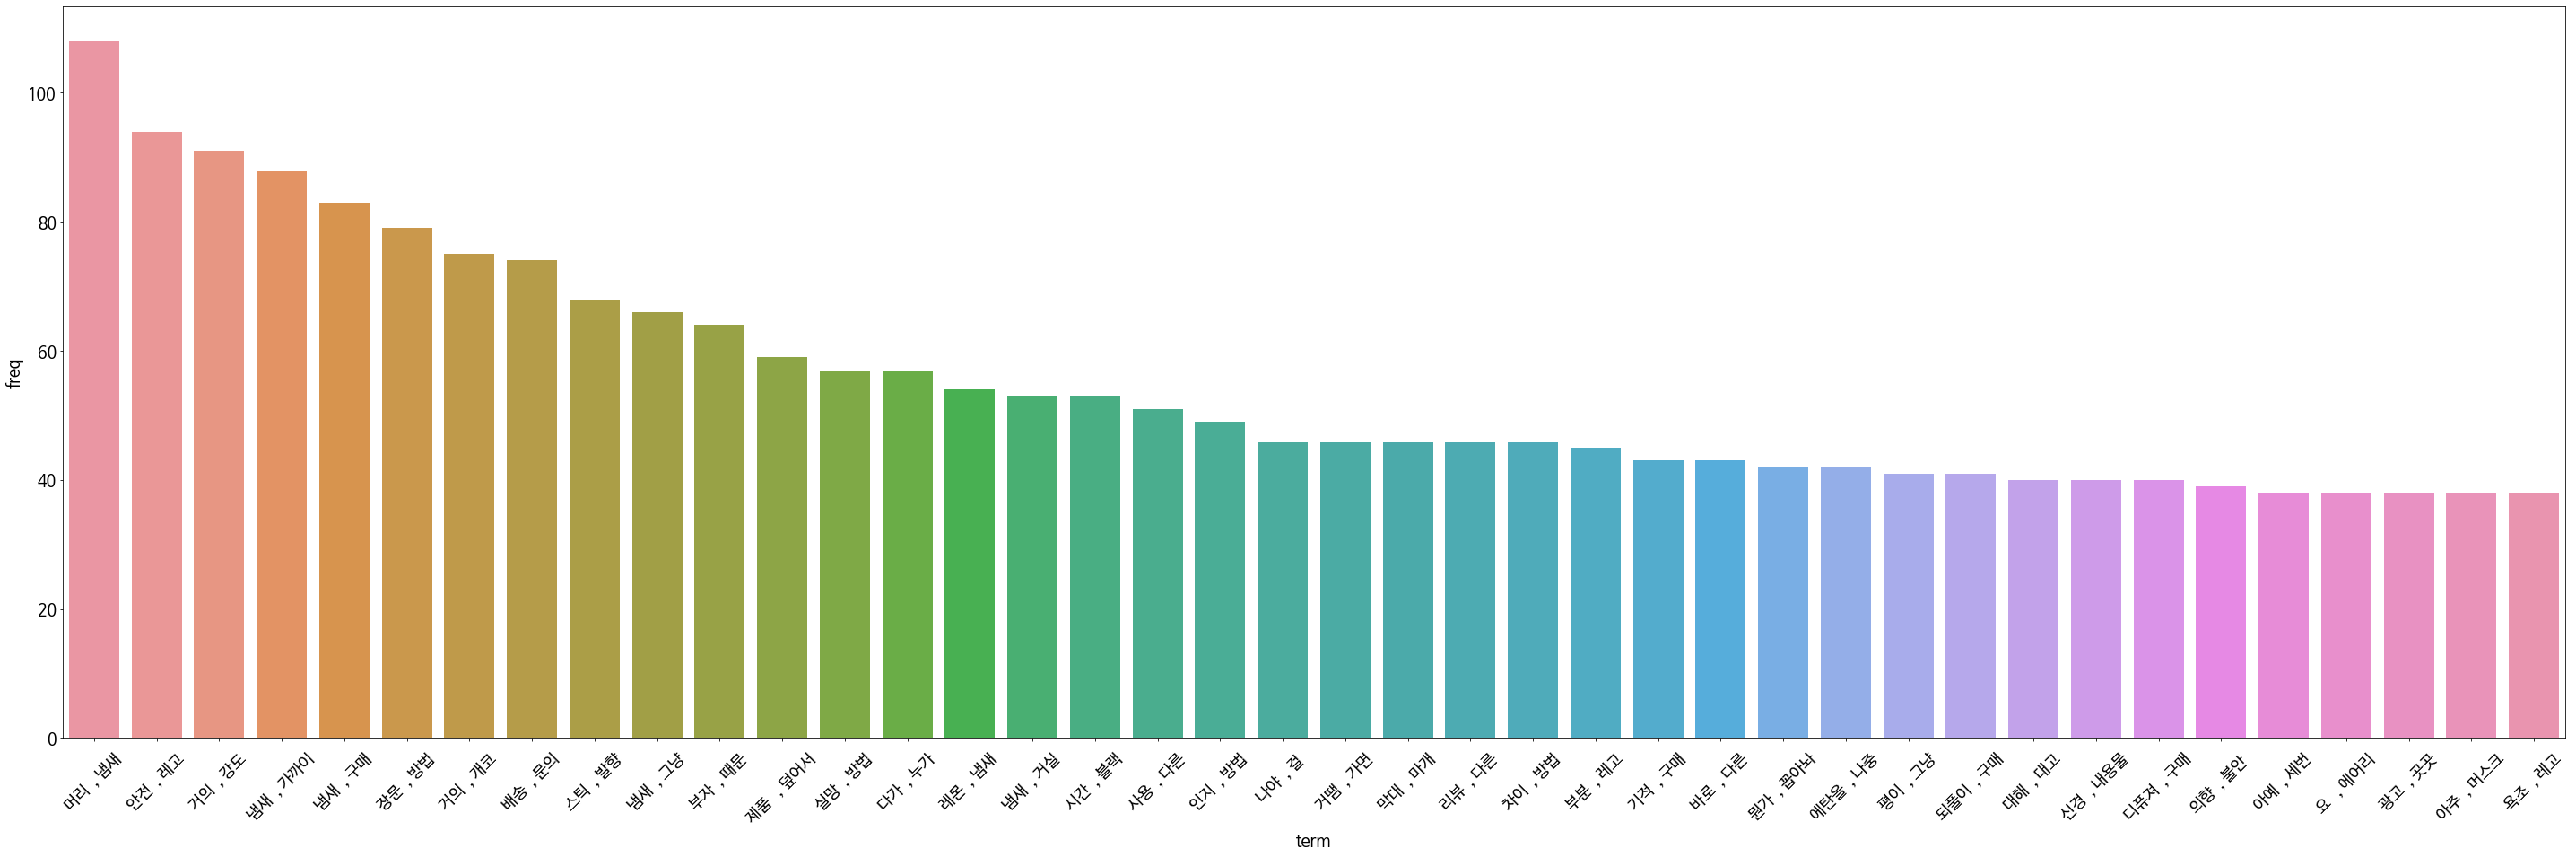

In [39]:
# 1점 동시출현빈도 시각화

from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data= df_1_Final.head(40),
    x= "term",
    y= "freq"
)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [50, 15] # [width, height] (inches)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 23
plt.show()

#2점 동시출현빈도

In [12]:
df2_score['review'] = df2_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

okt = Okt()

def nouns(x):
    if len(str(x)) >=1:
        nouns = okt.nouns(x)
    else:
        pass
    return nouns

df2_score['review'] = df2_score['review'].apply(lambda x: nouns(x))

df2_score['review'].head(3)

5212    [포레스트, 워, 향, 진짜, 전, 구매, 때, 에어리, 던, 처, 솝, 구매, 이...
5213    [원래, 디퓨져, 제, 사용, 주문, 일단, 향, 단조, 계속, 향, 사람, 두통,...
5214    [자, 후기, 보고, 가지, 구입, 각자, 취향, 글, 보고, 인, 센스, 우드, ...
Name: review, dtype: object

In [13]:
df2_score.to_csv('token_2.txt')

In [14]:
#2점_동시출현빈도

count_1 = {}   #동시출현 빈도가 저장될 dict
for line in open('token_2.txt'):
    words = list(set(line.split()))   #단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b:
              c, d = b, a 
              c, d = a, b   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            count_1[c, d] = count_1.get((c, d), 0) + 1   #실제로 센다


df=pd.DataFrame.from_dict(count_1, orient='index')

list1=[]
for i in range(len(df)):
    #index를 중심으로 계속 중첩해서 list에 넣는다 
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

#pandas 이용해서 df형태로 만들기 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

#불용어제거
df2['term1']= df2['term1'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df2['term2']= df2['term2'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
#내림차순 정렬
df2 = df2.sort_values(by=['freq'], axis=0, ascending=False)
#한글자 단어 삭제
df2 = df2[df2['term1'].apply(lambda x: len(x)>4) & df2['term2'].apply(lambda x: len(x)>4)]
#인덱스초기화
df2 = df2.reset_index(drop=True)

#컬럼합치기
df2['term'] =df2[['term1', 'term2']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df_2_Final = df2[['term','freq']]
df_2_Final

,term,freq
0,"퍼플 , 통틀어",72
1,"기대 , 구매",63
2,"오픈 , 대한",50
3,"냄새 , 구매",49
4,"냄새 , 가까이",47
...,...,...
12424,"대로 , 구매",1
12425,"5366 처음 , 정도",1
12426,"5366 처음 , 선물",1
12427,"5366 처음 , 예전",1


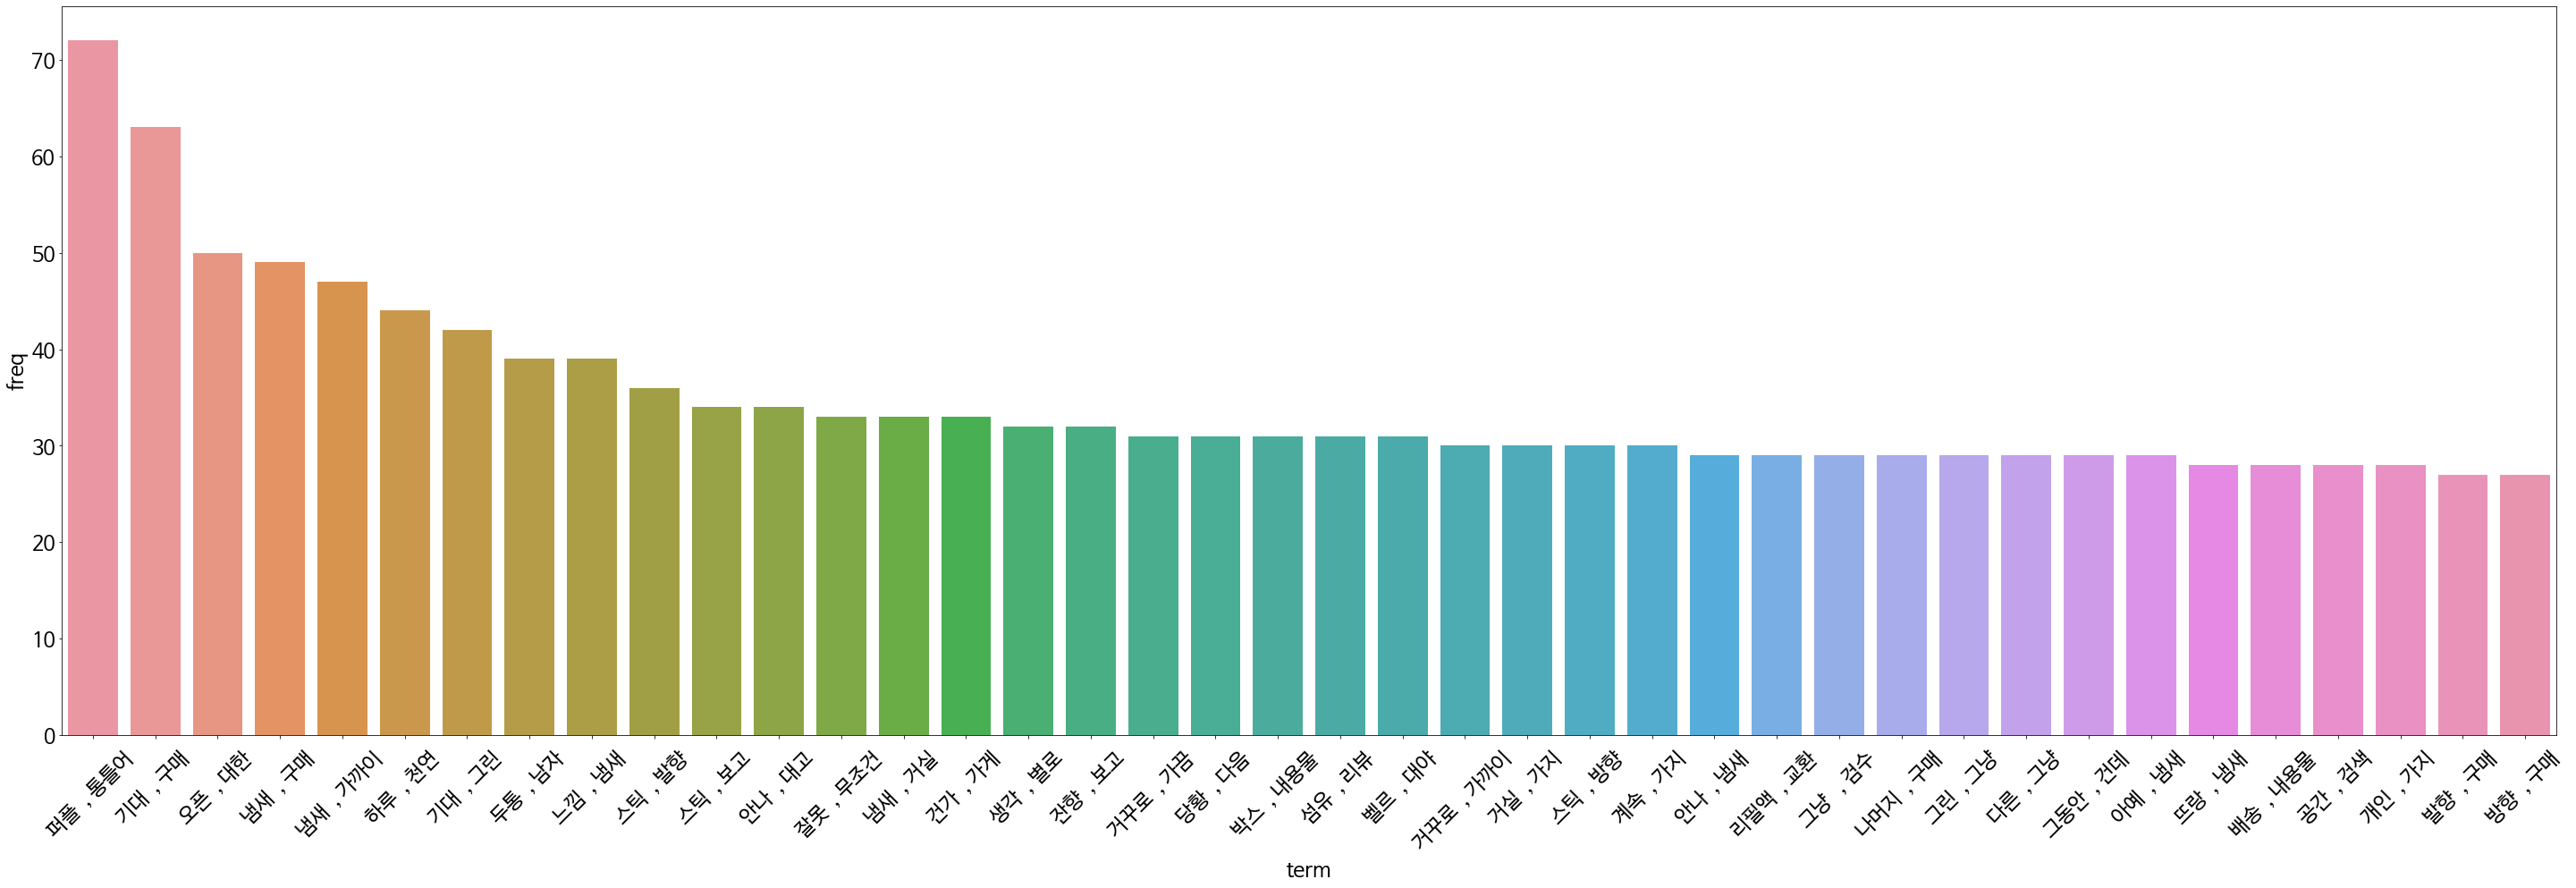

In [40]:
# 2점 동시출현빈도 시각화

from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data= df_2_Final.head(40),
    x= "term",
    y= "freq"
)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [50, 15] # [width, height] (inches)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 23
plt.show()

#3점 동시출현빈도

In [15]:
df3_score['review'] = df3_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

okt = Okt()

def nouns(x):
    if len(str(x)) >=1:
        nouns = okt.nouns(x)
    else:
        pass
    return nouns

df3_score['review'] = df3_score['review'].apply(lambda x: nouns(x))

df3_score['review'].head(3)

<ipython-input-15-e26cff656318>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_score['review'] = df3_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
<ipython-input-15-e26cff656318>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_score['review'] = df3_score['review'].apply(lambda x: nouns(x))


3644    [저, 향기, 예민, 한편, 평소, 꽃향, 가든, 향, 비누, 향, 인터넷, 구매,...
3645    [저, 오션, 브리즈, 이름, 키, 캔들, 크샌드, 바마, 브리즈, 생각, 그, 달...
3646    [제, 하루, 종일, 문, 향, 처음처럼, 그린, 에어리, 향, 최고, 그린, 에어...
Name: review, dtype: object

In [16]:
df3_score.to_csv('token_3.txt')

In [17]:
#3점_동시출현빈도

count_1 = {}   #동시출현 빈도가 저장될 dict
for line in open('token_3.txt'):
    words = list(set(line.split()))   #단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b:
              c, d = b, a 
              c, d = a, b   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            count_1[c, d] = count_1.get((c, d), 0) + 1   #실제로 센다


df=pd.DataFrame.from_dict(count_1, orient='index')

list1=[]
for i in range(len(df)):
    #index를 중심으로 계속 중첩해서 list에 넣는다 
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

#pandas 이용해서 df형태로 만들기 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

#불용어제거
df2['term1']= df2['term1'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df2['term2']= df2['term2'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
#내림차순 정렬
df2 = df2.sort_values(by=['freq'], axis=0, ascending=False)
#한글자 단어 삭제
df2 = df2[df2['term1'].apply(lambda x: len(x)>4) & df2['term2'].apply(lambda x: len(x)>4)]
#인덱스초기화
df2 = df2.reset_index(drop=True)

#컬럼합치기
df2['term'] =df2[['term1', 'term2']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df_3_Final = df2[['term','freq']]
df_3_Final

,term,freq
0,"옴겨 , 신발장",264
1,"냄새 , 그린",149
2,"그린 , 구매",145
3,"에어리 , 그린",122
4,"기존 , 구매",104
...,...,...
33942,"4840 향 , 편이",1
33943,"방향성 , 가성",1
33944,"4839 향 , 가성",1
33945,"4839 향 , 방향성",1


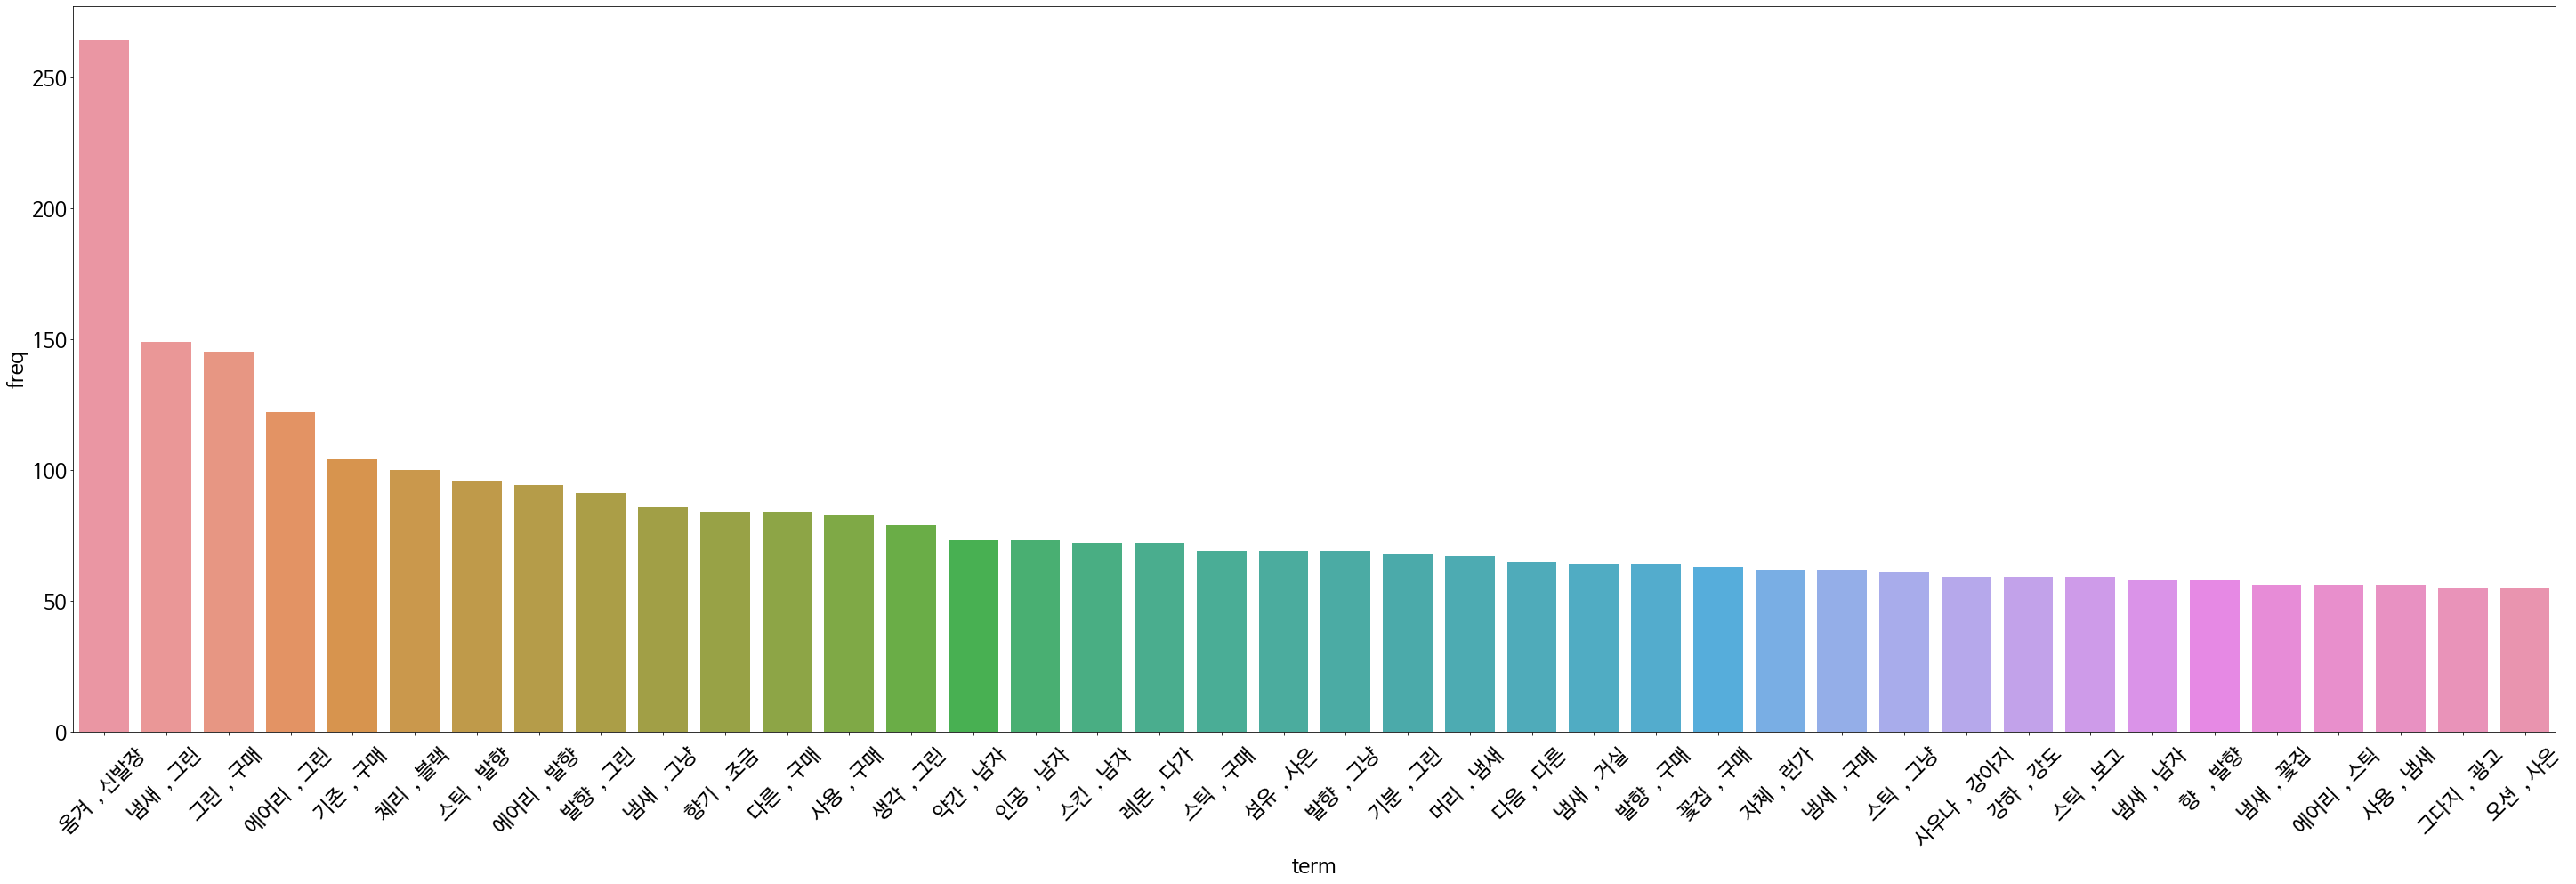

In [41]:
# 3점 동시출현빈도 시각화

from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data= df_3_Final.head(40),
    x= "term",
    y= "freq"
)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [50, 15] # [width, height] (inches)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 23
plt.show()

#4점 동시출현빈도

In [18]:
df4_score['review'] = df4_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

okt = Okt()

def nouns(x):
    if len(str(x)) >=1:
        nouns = okt.nouns(x)
    else:
        pass
    return nouns

df4_score['review'] = df4_score['review'].apply(lambda x: nouns(x))

df4_score['review'].head(3)

<ipython-input-18-3081c7181b67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_score['review'] = df4_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
<ipython-input-18-3081c7181b67>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_score['review'] = df4_score['review'].apply(lambda x: nouns(x))


2004    [에이, 센트, 판매, 분, 센스, 정말, 것, 주문, 때, 선물, 꾸러미, 오픈,...
2005    [처, 솝샤워, 후, 냄새, 도브향, 비슷, 손, 손, 기분, 그린, 에어리, 꽃,...
2006    [에이, 센트, 판매, 분, 센스, 정말, 것, 주문, 때, 선물, 꾸러미, 오픈,...
Name: review, dtype: object

In [19]:
df4_score.to_csv('token_4.txt')

In [20]:
#4점_동시출현빈도

count_1 = {}   #동시출현 빈도가 저장될 dict
for line in open('token_4.txt'):
    words = list(set(line.split()))   #단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b:
              c, d = b, a 
              c, d = a, b   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            count_1[c, d] = count_1.get((c, d), 0) + 1   #실제로 센다


df=pd.DataFrame.from_dict(count_1, orient='index')

list1=[]
for i in range(len(df)):
    #index를 중심으로 계속 중첩해서 list에 넣는다 
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

#pandas 이용해서 df형태로 만들기 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

#불용어제거
df2['term1']= df2['term1'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df2['term2']= df2['term2'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
#내림차순 정렬
df2 = df2.sort_values(by=['freq'], axis=0, ascending=False)
#한글자 단어 삭제
df2 = df2[df2['term1'].apply(lambda x: len(x)>4) & df2['term2'].apply(lambda x: len(x)>4)]
#인덱스초기화
df2 = df2.reset_index(drop=True)

#컬럼합치기
df2['term'] =df2[['term1', 'term2']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df_4_Final = df2[['term','freq']]
df_4_Final

,term,freq
0,"냄새 , 그린",470
1,"그린 , 구매",469
2,"에어리 , 그린",398
3,"향 , 조금",391
4,"기존 , 그냥",353
...,...,...
89116,"2625 처음 , 지인",1
89117,"제품 , 갈색",1
89118,"입구 , 가까이",1
89119,"입구 , 수면",1


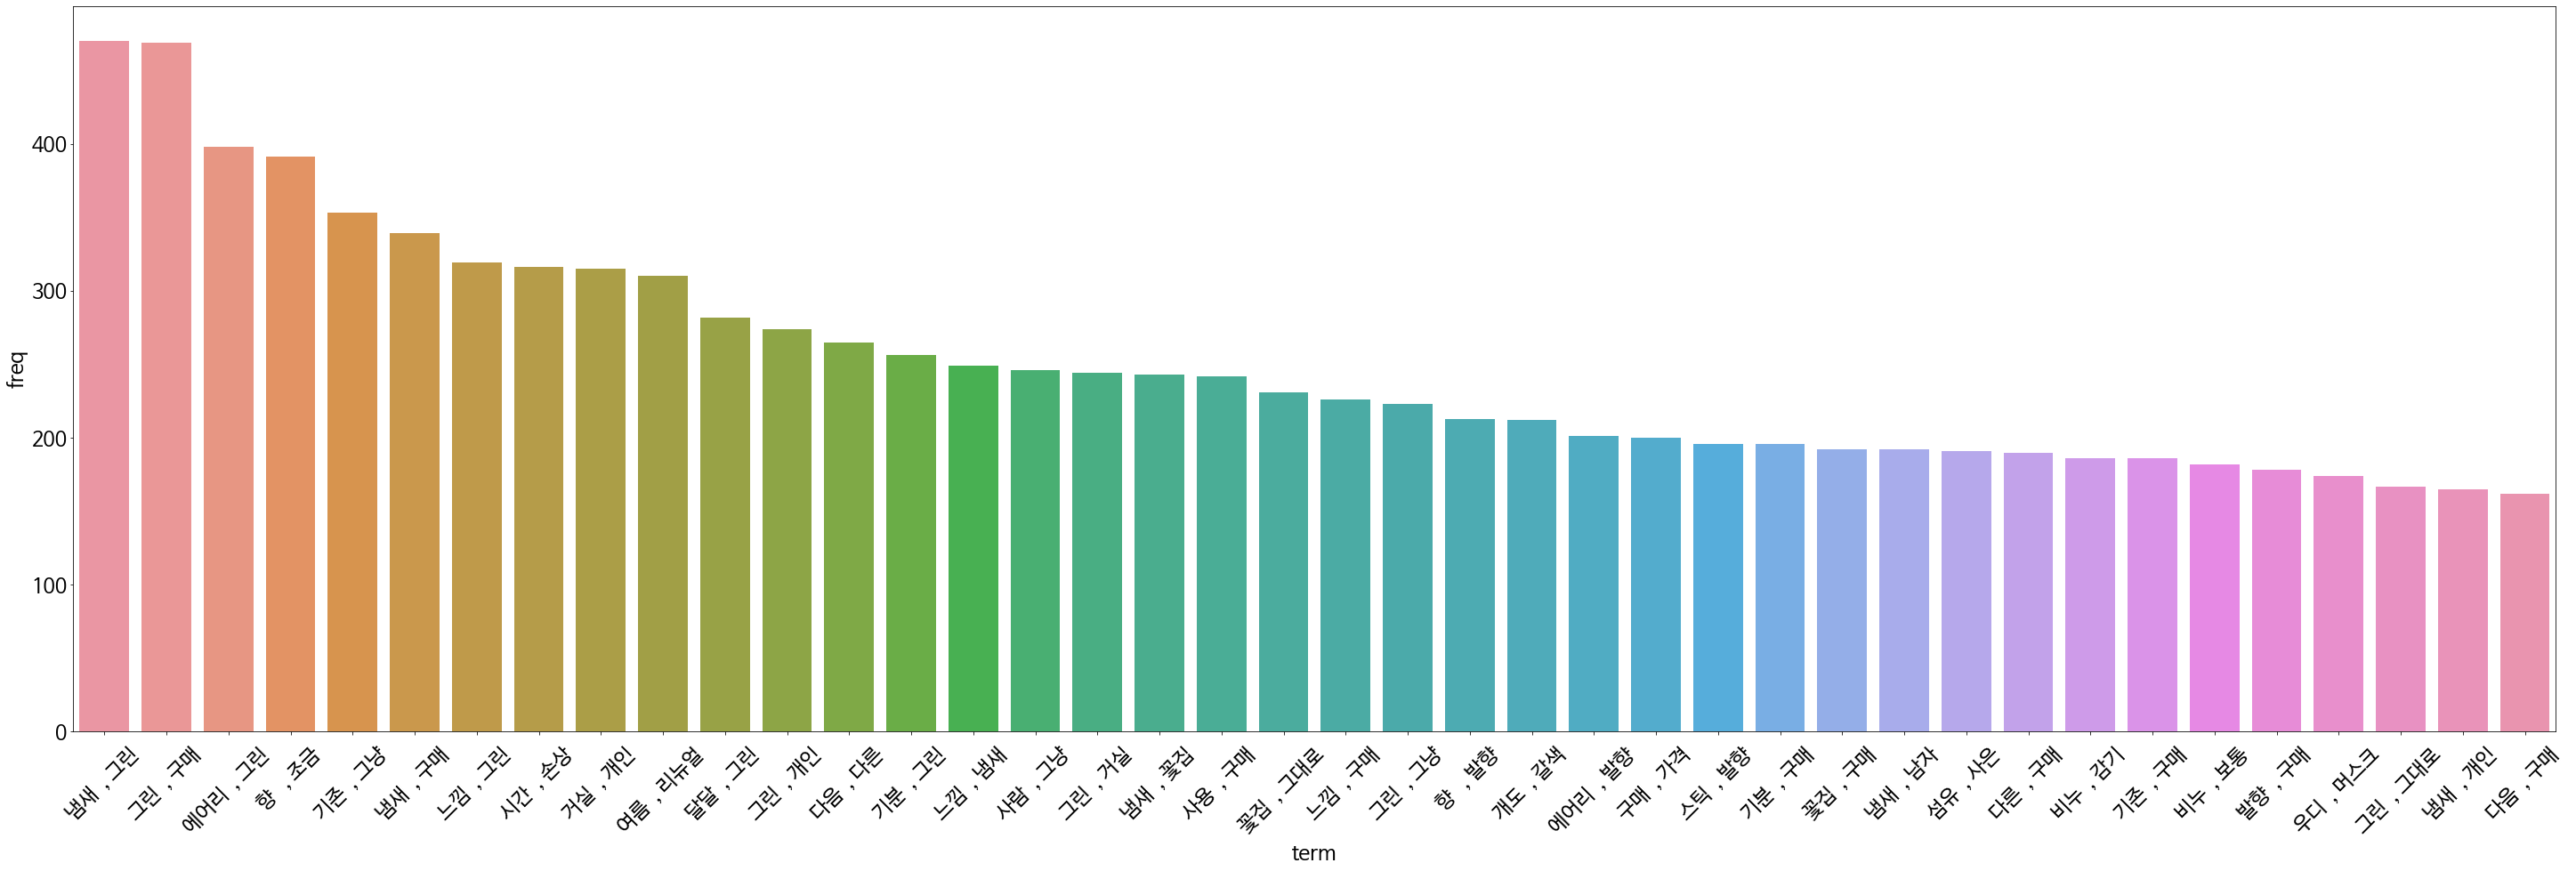

In [42]:
# 4점 동시출현빈도 시각화

from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data= df_4_Final.head(40),
    x= "term",
    y= "freq"
)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [50, 15] # [width, height] (inches)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 23
plt.show()

#5점 동시출현빈도

In [21]:
df5_score['review'] = df5_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

okt = Okt()

def nouns(x):
    if len(str(x)) >=1:
        nouns = okt.nouns(x)
    else:
        pass
    return nouns

df5_score['review'] = df5_score['review'].apply(lambda x: nouns(x))

df5_score['review'].head(3)

<ipython-input-21-f8c492ab208e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_score['review'] = df5_score['review'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
<ipython-input-21-f8c492ab208e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_score['review'] = df5_score['review'].apply(lambda x: nouns(x))


0    [백합, 튤립, 장미, 향, 무조건, 그린, 에어리, 제, 그린, 에어리, 벌써, ...
1    [개구, 매하, 개, 서비스, 구해, 욥, 평소, 에디, 퓨저, 백화점, 사서, 에...
2    [도대체, 왜, 이제, 이, 제품, 알, 된거, 왜, 그동안, 아무, 나, 거, 안...
Name: review, dtype: object

In [22]:
df5_score.to_csv('token_5.txt')

In [23]:
#5점_동시출현빈도

count_1 = {}   #동시출현 빈도가 저장될 dict
for line in open('token_5.txt'):
    words = list(set(line.split()))   #단어별로 분리한 것을 set에 넣어 중복 제거하고, 다시 list로 변경
    for i, a in enumerate(words):
        for b in words[i+1:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b:
              c, d = b, a 
              c, d = a, b   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            count_1[c, d] = count_1.get((c, d), 0) + 1   #실제로 센다


df=pd.DataFrame.from_dict(count_1, orient='index')

list1=[]
for i in range(len(df)):
    #index를 중심으로 계속 중첩해서 list에 넣는다 
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

#pandas 이용해서 df형태로 만들기 
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])

#불용어제거
df2['term1']= df2['term1'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
df2['term2']= df2['term2'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
#내림차순 정렬
df2 = df2.sort_values(by=['freq'], axis=0, ascending=False)
#한글자 단어 삭제
df2 = df2[df2['term1'].apply(lambda x: len(x)>4) & df2['term2'].apply(lambda x: len(x)>4)]
#인덱스초기화
df2 = df2.reset_index(drop=True)

#컬럼합치기
df2['term'] =df2[['term1', 'term2']].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df_5_Final = df2[['term','freq']]
df_5_Final

,term,freq
0,"그린 , 구매",3626
1,"꽃집 , 구매",3221
2,"냄새 , 그린",2704
3,"냄새 , 구매",2556
4,"느낌 , 그린",2448
...,...,...
425815,"타이밍 , 마음",1
425816,"타이밍 , 신상",1
425817,"타이밍 , 드레스",1
425818,"타이밍 , 심플",1


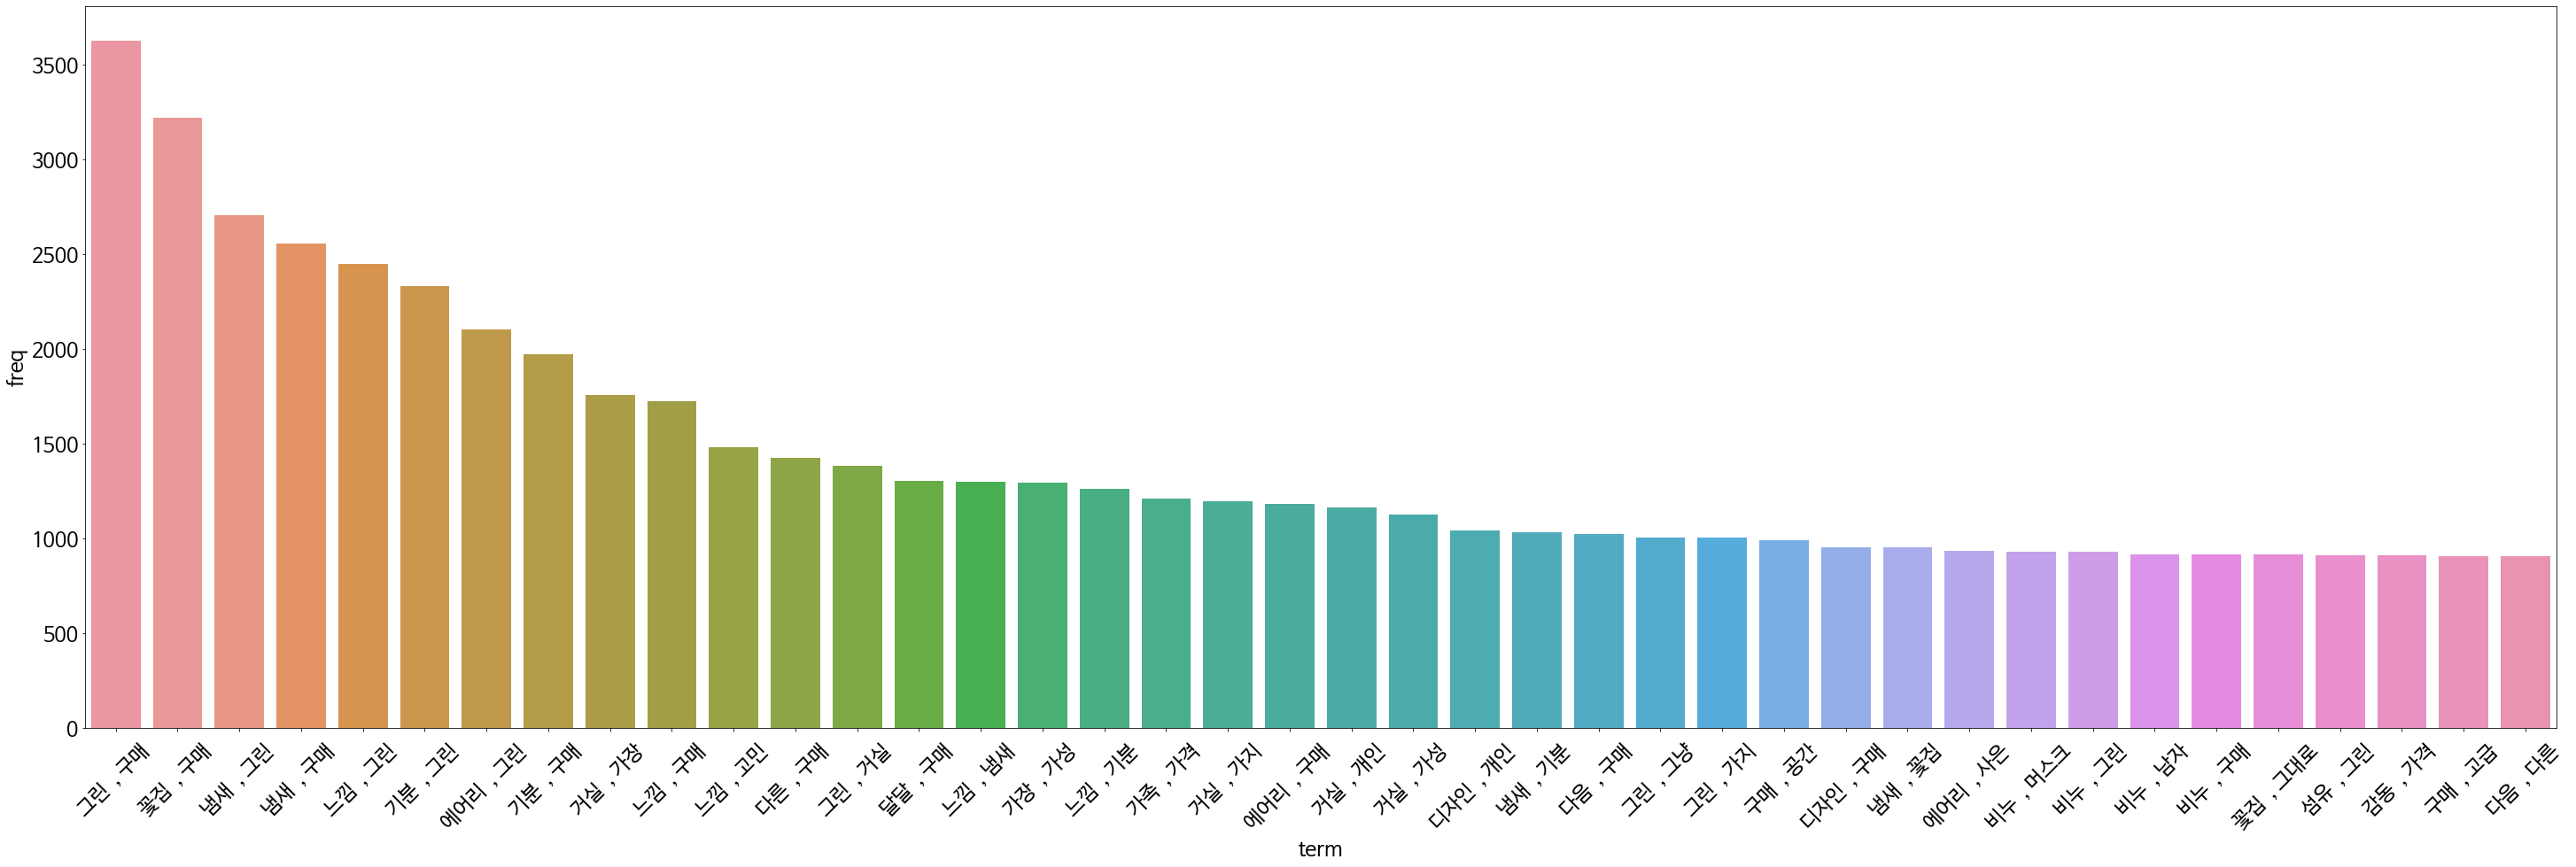

In [43]:
# 5점 동시출현빈도 시각화

from matplotlib import pyplot as plt
import seaborn as sns

sns.barplot(
    data= df_5_Final.head(40),
    x= "term",
    y= "freq"
)

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [50, 15] # [width, height] (inches)
plt.xticks(rotation=45)
plt.rcParams['font.size'] = 23
plt.show()